# K-Means Clustering for Iris Flowers 



*   sepal length (cm)
*   sepal width (cm)
*   petal length (cm)
*   petal width (cm)




### Import Data and Libraries

In [24]:
# Import libraries
import pandas as pd
import numpy as np

# Import the function from sklearn to download the sample iris dataset
from sklearn.datasets import load_iris

# Import the Unsupervised Learning ML model
from sklearn.cluster import KMeans

# Import function for splitting data to Training, Validation, and Test
from sklearn.model_selection import train_test_split

# Import class for scaling the observations from 0 to 1
from sklearn.preprocessing import StandardScaler


# Import matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
irisData = load_iris()
irisDf = pd.DataFrame( irisData.data, columns=irisData.feature_names )
irisDf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
# Only look at petal length and petal width to simplify the example
selectedFeatures = ['petal length (cm)', 'petal width (cm)']

# The .loc() method from Pandas is used to read data
# from any part of the data frame
#
# .loc(rowStart:rowEnd, columnNames)
# .values will extract the elements in the DataFrame (i.e, you'll get an array)
features = irisDf.loc[:, selectedFeatures]

# Preview first 10 rows of the feat
features[0:10]

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


### Scaling the Features
We will scale the features so that mean is 0 and variance 1.

In [27]:
# Apply scaling to all of the values in the features
features = StandardScaler().fit_transform( features )

# Preview the first 10
features[0:10]

array([[-1.34022653, -1.3154443 ],
       [-1.34022653, -1.3154443 ],
       [-1.39706395, -1.3154443 ],
       [-1.2833891 , -1.3154443 ],
       [-1.34022653, -1.3154443 ],
       [-1.16971425, -1.05217993],
       [-1.34022653, -1.18381211],
       [-1.2833891 , -1.3154443 ],
       [-1.34022653, -1.3154443 ],
       [-1.2833891 , -1.44707648]])

### EDA: Visualization

Text(0, 0.5, 'Petal Width (cm)')

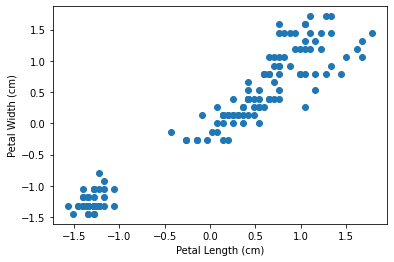

In [28]:
# Plot the graph and create the DataFrame for plotting
plotDf = pd.DataFrame( features, columns=['petal length (cm)','petal width (cm)'] )

# Plot with matplotlib
plt.scatter( plotDf['petal length (cm)'], plotDf['petal width (cm)'] )

# Add labels to the plot
plt.xlabel( 'Petal Length (cm)' )
plt.ylabel( 'Petal Width (cm)' )

### K-Means Clustering for Data

In [29]:
# Set the number of centroids for the model
kMeansML = KMeans(n_clusters=3)

# Use .fit() to learn the parameters of the features
kMeansML.fit( features )

KMeans(n_clusters=3)

In [30]:
# Get the labels predicted by kMeansML
labels = kMeansML.labels_

# We want to visualize the clusters so also get the centroids
centroids = kMeansML.cluster_centers_

### Visualize the results of K-Means Clustering

In [31]:
# Again create a DataFrame from the scaled features
featuresDf = pd.DataFrame( features, columns=['petal length (cm)', 'petal width (cm)'] )
featuresDf.head()

,petal length (cm),petal width (cm)
0,-1.340227,-1.315444
1,-1.340227,-1.315444
2,-1.397064,-1.315444
3,-1.283389,-1.315444
4,-1.340227,-1.315444


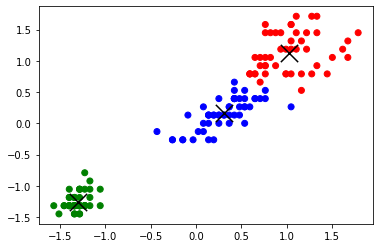

In [32]:
# Create an array of color channels
colorMap = np.array( ['r','g','b'] )

# Generate the scatterplot for the features (centroids)
plt.scatter(
  featuresDf['petal length (cm)'],  # x-coordinates
  featuresDf['petal width (cm)'],   # y-coordinates
  c=colorMap[labels]                # colors for each cluster
)

# Generate the scatterplot for the labels (centroids)
plt.scatter( 
  centroids[:, 0],                  # x-coordinates
  centroids[:, 1],                  # y-coordinates
  s=300,                            # size of the markers
  marker='x',                       # character to indicate the centrods
  c='k'                             # Number of color channels, k = 3
)

Text(0.5, 1.0, 'Elbow curve')

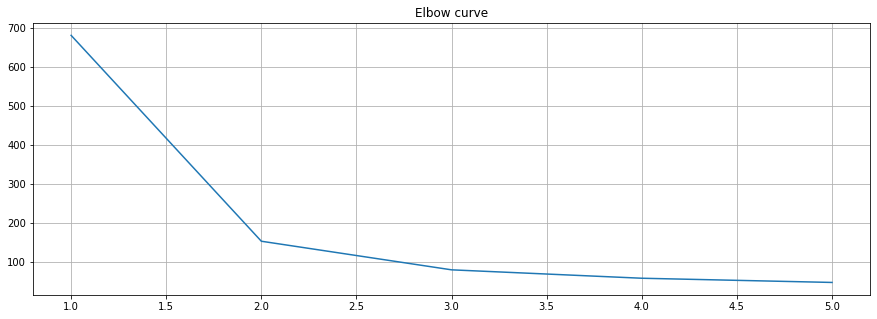

In [34]:


X = featuresDf
distorsions = []
for k in [1,2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot([1,2,3,4,5], distorsions)
plt.grid(True)
plt.title('Elbow curve')